# Qiskit Fall Fest Workshop - Shor's Algorithm

**Azain Khalid**  
Department of Computer Science, Purdue University

---

<a href="https://colab.research.google.com/github/AzAINN/Qiskit-Fall-Fest-Purdue-University/blob/main/shors-algorithm.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


**Goal** Given N=p×q, find its factors p and q

**Observation**: Factoring **N** can be reduced to finding the **period r** of a function:

$$f(x) = a^x \bmod N$$

where:
- **a** is a randomly chosen integer such that 1 < a < N and gcd(a, N) = 1
- **r** is the smallest positive integer such that $a^r \equiv 1 \pmod{N}$
- This **r** is called the **multiplicative order** of a modulo N


**Shors Algorthim** Allows us to find ***r***

### Shors Algorithm broken down into steps

1. **Quantum Part** 
    - QFT Black box -> Takes in a bit string (e.g |101>) and represents the the value in terms of phase (relative) (rotation within the block sphere)
    - QPE -> This circuit is built using QFT and utilizes the phase property. It helps us extract the eigenvalues in the phase
2. **Classical Post Processing** 
    - We process the result from the Quantum Circuit to get our beautiful r

### Environment Setup
Run the cells below to import/install the required dependencies

In [ ]:
%pip install qiskit

# could require installation of nump other dependencies here

In [67]:
import numpy as np # python library for straightforward numerical and scientific computations
from qiskit import QuantumCircuit # to build the quantum circuit and apply quantum gates
from math import gcd # to calculate the greatest common divisor
from qiskit.circuit.library import QFT
from qiskit.primitives import StatevectorSampler

# Other dependencies



# Shor's Order Finding

Given $a, N$, you need to find the multiplicative order $r$ of $a$ in modulus $N$, which is $$r=\min\{k | ~~a^k\equiv 1\pmod{N}\}.$$

1. The function `order_finding` generates the quantum circuit implementing the quantum part of Shor's order finding algorithm. The inputs correspond to $a, N$. The circuit should contain $O(\mathrm{polylog}(N))$ gates.
2. The function `post_processing` generates $r$ from the measurement results. (Implemented)
3. The function `ModMult(n, a, N)` is provided, which calculates $$|x\rangle_n\xrightarrow{\mathrm{ModMult}(n, a, N)}|ax~\mathrm{mod}~N\rangle_n$$ for $0\leq x < N < 2^n.$
4. In the evaluation, $(a, N)=1$ and $2<N$ will be guaranteed.

In [ ]:
# UNITARY Matrix BOX

# action: Modular Multiplication

# This is an oracle implementation of ModMult(n, a, N)
# Qubit indices: 0 = least-significant bit (LSB), (n-1) = most-significant bit (MSB)
# Example: For n=5, state |qubit4 qubit3 qubit2 qubit1 qubit0> 
#          represents binary number with qubit0 as LSB and qubit4 as MSB

def U_modmult(n, a, N):
  qc = QuantumCircuit(n)
  U = np.zeros((2 ** n, 2 ** n))
  for i in range(2 ** n):
    if gcd(i, N) == 1 and i < N:
      U[(a * i) % N, i] = 1
    else:
      U[i, i] = 1
  qc.unitary(U, qubits=range(n))
  return qc


The following is the core part of this problem where we need to implemenet `order_finding` function that does the quantum part of shor's algorithm  
Notice that, in `order_finding`, you can directly use `ModMult`

In [ ]:
# Implement the quantum part of shors algorithm

# inputs are a, N
def order_finding(a, N):
    
    ###################################################################################################################################
    #      We need qubits to work with, the number depends on the input value N (we want to find the prime factors of this number)    #
    ###################################################################################################################################
    
    """ qubits for the target register (the one being acted on by the gate U defined above) |n>
        n = number of qubits needed to represent numbers up to N (since N < 2^n) """
    
    #code here
     
    
    """ qubits for the counting register (the control qubits - control the implementation of U onto |n> register containing target qubits)
    m = 2*n qubits needed for sufficient precision in phase estimation (ensures ~1/n^2 success probability) """
    
    #code here
    
    """ Create quantum circuit with counting qubits + target qubits
    Total: m+n qubits (m counting qubits + n target qubits)
    Classical register: m bits to measure the counting register  """
    
    qc = QuantumCircuit(m + n, m)
    
    
    
    ###################################################################################################################################
    #                                  Apply quantum gates to the qubits in our quantum circuit                                       #
    ###################################################################################################################################
    
    
    """ Initialize target register to |1⟩
        Qubit index m is the least significant bit of the target register """ 
        # code here
    
    """ Apply Hadamard gates to all counting qubits
        Each counting qubit is put in superposition: |+⟩ = (|0⟩ + |1⟩)/√2
        This creates a uniform superposition over all 2^m possible counting register states """
        
        # code here

    
    ###################################################################################################################################
    #                                              Quantum Phase Estimation (QPE)                                                     #
    ###################################################################################################################################
    
    
    """ Controlled modular multiplication operations
        This implements the quantum phase estimation algorithm
        For each counting qubit j, we apply controlled-U^(2^j) where U is the modular multiplication operator"""
    
    for j in range(m):
        # Calculate a^(2^j) mod N - this is the power we need for the j-th controlled operation

        a_power = pow(a, 2**j, N)    # a^(2^j) mod N
                    
        # Create the ModMult circuit that performs |x⟩ -> |a^(2^j) * x mod N⟩
        mod_mult_circuit = U_modmult(n, a_power, N)
        
        # Make it controlled by counting qubit j
        # This means: if counting qubit j is |1⟩, apply the modular multiplication
        controlled_mod = mod_mult_circuit.control(1) 
        
        # Append to circuit: control qubit j, then target qubits m through m+n-1
        qc.append(controlled_mod, [j] + list(range(m, m + n)))
        
    
    ###################################################################################################################################
    #                   iQFT (inverse of Quantum Fourier Transform)       [phase to binary]                                           #
    ###################################################################################################################################
    
    """ Apply inverse QFT to the counting register (qubits 0 to m-1)
        This converts the phase information encoded in the counting register back to a binary number"""
    
    #code here
    
    
    
    
    """ add onto the circuit ( for convention we want to reverse the qubit list, so gate is applied in reverse order)"""
    
    # code here                                                

    
    """ Measure the counting qubits
        This gives us a measurement result that encodes the phase, which we'll use to find the period r"""
    qc.measure(range(m), range(m))
    
    
    return qc


Visualize the circuit

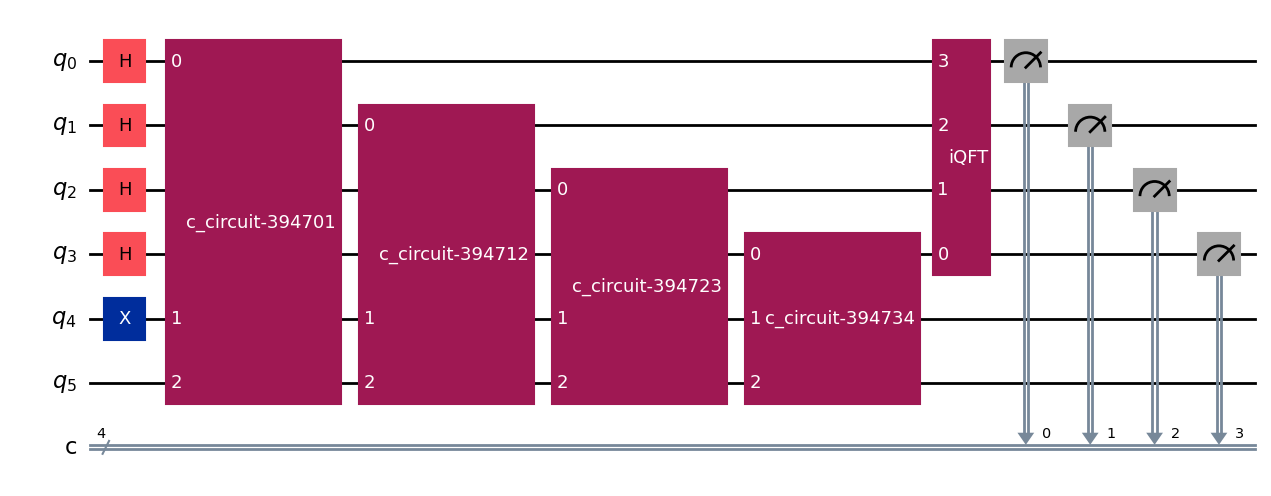

In [70]:
qc = order_finding(2, 3)
qc.draw(output='mpl')


### Classical Step: Post Processing - Uses continued Fractions to extract the period r

In [ ]:
# The classical post-processing of quantum counting algorithm


# Note the results are in lowest-index -> highest-index order
# I.e., an item of the results is str([m_0, m_1, ..., m_{n-1}])
#   where m_j is the measurement results of qubit with index j
# You only need to generate a list, where M_estimate appears with
#  frequency at least 4/pi^2.

from fractions import Fraction

def post_process(a, N, results):
    n = N.bit_length()
    m = 2 * n

    candidates = []

    for result in results:
        # Convert binary string to integer
        x = int(result, 2)
        if x == 0:
            continue

        # Measured phase ≈ s / r
        phase = x / (2 ** m)

        # Approximate phase as a rational s/r with denominator ≤ N
        frac = Fraction(phase).limit_denominator(N)
        r = frac.denominator

        # Check if r is a valid order
        if 0 < r < N and pow(a, r, N) == 1:
            candidates.append(r)

    # Return the smallest valid order found (matches order(a, N))
    if candidates:
        return min(candidates)

    return None


### Example - Now we test our algorithm
N = 15  
a = 2

We expect 3 and 5 after applying shors to find the prime factors of 15!

In [ ]:
# Parameters for the demo
N = 15
a = 2
shots = 1000

# Build the order-finding circuit
qc = order_finding(a, N)
qc.draw('mpl')

sampler = StatevectorSampler(default_shots=shots, seed=42)
job = sampler.run([qc])
res = job.result()[0]

# Get measurement counts and convert to bitstrings (LSB-first)
cnts = res.data[list(res.data.keys())[0]].get_counts()
samples = [bitstring[::-1] for bitstring, count in cnts.items() for _ in range(count)]


# Classical Post processing to extract r
r = post_process(a, N, samples)
print(f"Estimated order r for a={a} mod N={N}: r = {r}")


# Use r to find non-trivial factors of N (if possible)
if r is not None and r % 2 == 0:
    x = pow(a, r // 2, N)
    p = gcd(x - 1, N)
    q = gcd(x + 1, N)
    print(f"Candidate factors from r: p = {p}, q = {q}")
else:
    print("retry gang")

Estimated order r for a=2 mod N=15: r = 4
Candidate factors from r: p = 3, q = 5


## Elaborative Evaluation

The following part evaluates your solution. You may check the details to understand how the evaluation works.

DO NOT modify anything below!

We run the whole notebook from the start to the end. In the end, `eval()` is executed. If it returns True, you passed the evaluation. Elsewise, you failed this problem.

In [73]:
seed = 42

np.random.seed(seed)

In [74]:
def order(a, N):
  for r in range(2, N):
    if pow(a, r, N) == 1:
      return r
  return None

In [75]:
from qiskit.primitives import StatevectorSampler

num_tests = 20
n_max = 5
shots = 30   # This grants a high success probability

sampler = StatevectorSampler(default_shots = shots, seed=seed)

passed = True
for idx in range(num_tests):
  n = np.random.randint(2, n_max+1)
  N = np.random.randint(np.max((3, 2**(n-1))), 2**n)   # Generate a random n
  a = np.random.randint(2, N)      # Generate a random a
  while gcd(a, N) != 1:
    a = np.random.randint(2, N)

  qc = order_finding(a, N)    # Call your functions to generate qc

  # The following code will generate a list of measurement results
  job = sampler.run([qc])
  res = job.result()[0]
  cnts = res.data[list(res.data.keys())[0]].get_counts()
  samples = [item[::-1] for item, count in cnts.items() for _ in range(count)]

  # Use the above post-processing function to find M from the samples
  r = post_process(a, N, samples)

  if r != order(a, N):
    passed = False
    break

def eval():
  return passed

print(eval())

True
